# Bayesian network learning（pgmpy example）
### parameter learning

In [16]:
import pandas as pd
data = pd.DataFrame(data={'fruit': ["banana", "apple", "banana", "apple", "banana","apple", "banana", 
                                    "apple", "apple", "apple", "banana", "banana", "apple", "banana",], 
                          'tasty': ["yes", "no", "yes", "yes", "yes", "yes", "yes", 
                                    "yes", "yes", "yes", "yes", "no", "no", "no"], 
                          'size': ["large", "large", "large", "small", "large", "large", "large",
                                    "small", "large", "large", "large", "large", "small", "small"]})
print(data)

     fruit tasty   size
0   banana   yes  large
1    apple    no  large
2   banana   yes  large
3    apple   yes  small
4   banana   yes  large
5    apple   yes  large
6   banana   yes  large
7    apple   yes  small
8    apple   yes  large
9    apple   yes  large
10  banana   yes  large
11  banana    no  large
12   apple    no  small
13  banana    no  small


### Construct bayesian network model

In [17]:
from pgmpy.models import BayesianModel

model = BayesianModel([('fruit', 'tasty'), ('size', 'tasty')])  # fruit -> tasty <- size

### State counts

In [18]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, data)
print("\n", pe.state_counts('fruit'))  # unconditional 
print("\n", pe.state_counts('tasty'))  # conditional on fruit and size


         fruit
apple       7
banana      7

 fruit apple       banana      
size  large small  large small
tasty                         
no      1.0   1.0    1.0   1.0
yes     3.0   2.0    5.0   0.0


### Maximum likelihood estimation

In [19]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, data)
print(mle.estimate_cpd('fruit'))  # unconditional probability
print(mle.estimate_cpd('tasty'))  # conditional probability

╒═══════════════╤═════╕
│ fruit(apple)  │ 0.5 │
├───────────────┼─────┤
│ fruit(banana) │ 0.5 │
╘═══════════════╧═════╛
╒════════════╤══════════════╤════════════════════╤═════════════════════╤═══════════════╕
│ fruit      │ fruit(apple) │ fruit(apple)       │ fruit(banana)       │ fruit(banana) │
├────────────┼──────────────┼────────────────────┼─────────────────────┼───────────────┤
│ size       │ size(large)  │ size(small)        │ size(large)         │ size(small)   │
├────────────┼──────────────┼────────────────────┼─────────────────────┼───────────────┤
│ tasty(no)  │ 0.25         │ 0.3333333333333333 │ 0.16666666666666666 │ 1.0           │
├────────────┼──────────────┼────────────────────┼─────────────────────┼───────────────┤
│ tasty(yes) │ 0.75         │ 0.6666666666666666 │ 0.8333333333333334  │ 0.0           │
╘════════════╧══════════════╧════════════════════╧═════════════════════╧═══════════════╛


In [20]:
# Calibrate all CPDs of `model` using MLE
model.fit(data, estimator=MaximumLikelihoodEstimator)

### draw the bayesian network

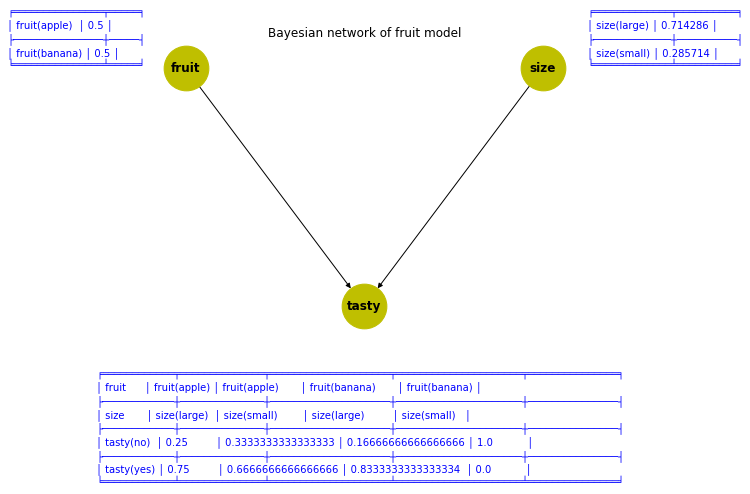

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# draw the bayesian netowrk (node+dependencies)
nx.draw(model, with_labels=True, node_size=2000, font_weight='bold', node_color='y', \
        pos={"tasty":[4,5],"fruit":[2,7],"size":[6,7]})
plt.text(0,7,model.get_cpds("fruit"), fontsize=10, color='b')
plt.text(6.5,7,model.get_cpds("size"), fontsize=10, color='b')
plt.text(1,3.5,model.get_cpds("tasty"), fontsize=10, color='b')
plt.title("Bayesian network of fruit model")
plt.show()

### parameter estimate（prior is BDeu）

In [22]:
from pgmpy.estimators import BayesianEstimator
est = BayesianEstimator(model, data)

print(est.estimate_cpd('tasty', prior_type='BDeu', equivalent_sample_size=10))

╒════════════╤═════════════════════╤════════════════════╤════════════════════╤═════════════════════╕
│ fruit      │ fruit(apple)        │ fruit(apple)       │ fruit(banana)      │ fruit(banana)       │
├────────────┼─────────────────────┼────────────────────┼────────────────────┼─────────────────────┤
│ size       │ size(large)         │ size(small)        │ size(large)        │ size(small)         │
├────────────┼─────────────────────┼────────────────────┼────────────────────┼─────────────────────┤
│ tasty(no)  │ 0.34615384615384615 │ 0.4090909090909091 │ 0.2647058823529412 │ 0.6428571428571429  │
├────────────┼─────────────────────┼────────────────────┼────────────────────┼─────────────────────┤
│ tasty(yes) │ 0.6538461538461539  │ 0.5909090909090909 │ 0.7352941176470589 │ 0.35714285714285715 │
╘════════════╧═════════════════════╧════════════════════╧════════════════════╧═════════════════════╛


In [23]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

# generate data set and bayesian network
data = pd.DataFrame(np.random.randint(low=0, high=2, size=(5000, 4)), columns=['A', 'B', 'C', 'D'])
model = BayesianModel([('A', 'B'), ('A', 'C'), ('D', 'C'), ('B', 'D')])

model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5
for cpd in model.get_cpds():
    print((cpd))

╒══════╤══════════╕
│ A(0) │ 0.490809 │
├──────┼──────────┤
│ A(1) │ 0.509191 │
╘══════╧══════════╛
╒══════╤══════╤══════╕
│ A    │ A(0) │ A(1) │
├──────┼──────┼──────┤
│ B(0) │ 0.5  │ 0.5  │
├──────┼──────┼──────┤
│ B(1) │ 0.5  │ 0.5  │
╘══════╧══════╧══════╛
╒══════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╕
│ A    │ A(0)               │ A(0)               │ A(1)                │ A(1)                │
├──────┼────────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ D    │ D(0)               │ D(1)               │ D(0)                │ D(1)                │
├──────┼────────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ C(0) │ 0.4934385892966988 │ 0.5145483936148717 │ 0.49489094124582433 │ 0.504309500489716   │
├──────┼────────────────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ C(1) │ 0.5065614107033012 │ 0.4854516063851283 │ 0.5051090587541757  │ 0

In [24]:
#检查道德图
model.get_independencies()

(A _|_ D | B)
(B _|_ C | A, D)
(C _|_ B | A, D)
(D _|_ A | B)

### draw the bayesian network

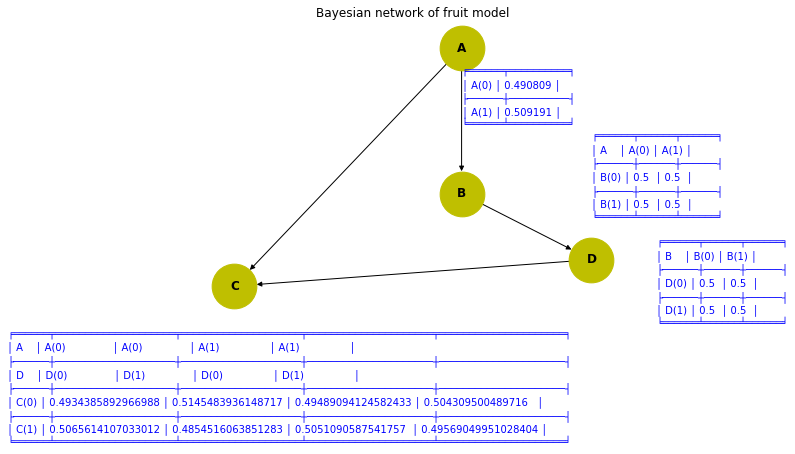

In [75]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# draw the bayesian netowrk (node+dependencies)
nx.draw(model, with_labels=True, node_size=2000, font_weight='bold', node_color='y', \
        pos={"A":[8,18],"B":[8,7],"C":[4.5,0], "D":[10,2]})
plt.text(8,12,model.get_cpds("A"), fontsize=10, color='b')
plt.text(10,5,model.get_cpds("B"), fontsize=10, color='b')
plt.text(1,-12,model.get_cpds("C"), fontsize=10, color='b')
plt.text(11,-3,model.get_cpds("D"), fontsize=10, color='b')
plt.title("Bayesian network of fruit model")
plt.show()

In [67]:
print(data)

      A  B  C  D
0     1  0  1  1
1     0  0  0  1
2     1  0  1  0
3     1  1  0  0
4     1  1  1  1
5     0  1  0  0
6     0  0  1  1
7     1  1  0  0
8     0  1  0  0
9     0  1  0  0
10    1  0  0  1
11    1  1  1  0
12    1  0  1  0
13    1  1  1  0
14    1  1  1  1
15    0  0  0  0
16    0  1  1  0
17    1  0  0  0
18    1  0  0  0
19    0  0  0  0
20    0  0  1  0
21    1  1  1  0
22    0  1  0  0
23    1  1  1  0
24    0  1  1  1
25    1  1  1  0
26    0  1  1  0
27    1  1  1  0
28    0  1  0  0
29    0  0  0  1
...  .. .. .. ..
4970  0  1  1  1
4971  0  0  0  1
4972  1  1  0  0
4973  1  0  0  1
4974  0  0  1  0
4975  0  0  1  1
4976  1  0  0  1
4977  1  1  1  1
4978  0  1  1  0
4979  0  0  1  1
4980  0  1  0  1
4981  0  1  1  0
4982  0  1  0  0
4983  0  1  0  0
4984  0  0  1  1
4985  1  0  1  0
4986  1  1  0  1
4987  1  1  1  1
4988  0  1  0  0
4989  0  0  1  0
4990  0  1  1  1
4991  1  0  1  1
4992  1  0  0  0
4993  1  1  0  1
4994  0  1  0  0
4995  0  0  1  1
4996  0  1  1 

In [72]:
import pandas as pd
import numpy as np
from pgmpy.estimators import ConstraintBasedEstimator

data = pd.DataFrame(np.random.randint(0, 2, size=(5000, 5)), columns=list('ABCDE'))

print(data)

      A  B  C  D  E
0     0  1  0  1  0
1     1  1  0  1  1
2     1  0  1  0  1
3     0  1  0  0  1
4     0  0  0  0  1
5     0  0  0  1  0
6     1  0  0  0  0
7     0  0  0  1  0
8     1  0  1  1  1
9     1  0  1  0  0
10    0  0  1  0  0
11    1  0  1  0  1
12    0  1  0  0  1
13    1  0  0  0  1
14    1  0  0  1  1
15    0  0  1  0  1
16    0  1  0  1  1
17    1  0  1  1  1
18    0  0  1  1  0
19    1  0  0  1  1
20    1  1  0  1  0
21    1  0  0  0  1
22    0  1  0  0  1
23    1  1  1  0  0
24    1  0  1  0  1
25    0  0  1  1  1
26    0  0  1  1  1
27    1  0  0  1  1
28    0  0  1  0  0
29    1  1  0  0  1
...  .. .. .. .. ..
4970  0  0  1  0  0
4971  1  0  0  0  1
4972  1  0  1  1  1
4973  1  0  0  0  1
4974  1  1  0  1  1
4975  0  0  1  0  0
4976  0  0  0  1  1
4977  1  1  1  0  1
4978  0  1  0  1  0
4979  1  0  1  1  0
4980  0  1  1  1  0
4981  0  1  0  0  0
4982  1  0  0  1  1
4983  1  0  1  0  1
4984  1  1  1  0  0
4985  1  1  1  1  1
4986  1  1  1  1  0
4987  0  1  1  0  0
